# <center>Лабораторная работа №1</center>

## <center> Выполнила Мосева Алеся Сергеевна БВТ2001</center>

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь")


In [3]:
%pip install numpy
%pip install pandas
%pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\lesya\appdata\local\programs\python\python310\lib\site-packages (1.5.3)




[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.6/7.6 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 17.5 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 15.4 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ------------------------------------- 163.0/163.0 kB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [5]:
data = pd.read_csv('./titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [6]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [8]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [9]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [10]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [11]:
age_categories = [age_category(age) for age in data.Age]

In [12]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [13]:
data['Age_category'] = data['Age'].apply(age_category)

In [14]:
data['Age_category'].value_counts()

1    384
2    288
3    219
Name: Age_category, dtype: int64

**1. Сколько мужчин / женщин находилось на борту?**
- 314 мужчин и 577 женщин


In [18]:
data.groupby(['Sex']).Sex.count()

Sex
female    314
male      577
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 108


In [23]:
print(data.groupby(['Pclass']).Pclass.count())
print(data.groupby(['Pclass', 'Sex']).Pclass.count())

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69

In [29]:
print('Медиана: {:.2f}'.format(data['Fare'].median()))
print('Стандартное отклонение: {:.2f}'.format(data['Fare'].std()))


Медиана: 14.45
Стандартное отклонение: 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 40.6% среди молодых и 22.7% среди старых

In [36]:
print('Выживали моложе 30 лет {:.1f}%'.format(data[data['Age'] < 30]['Survived'].mean() * 100))
print('Выживали старше 60 {:.1f}%'.format(data[data['Age'] > 60]['Survived'].mean() * 100))

Выживали моложе 30 лет 40.6%
Выживали старше 60 22.7%


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 18.9% среди мужчин и 74.2% среди женщин

In [38]:
print('Выживали мужчины {:.1f}%'.format(data[data['Sex'] == 'male']['Survived'].mean() * 100))
print('Выживали женщины {:.1f}%'.format(data[data['Sex'] == 'female']['Survived'].mean() * 100))

Выживали мужчины 18.9%
Выживали женщины 74.2%


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- William

In [73]:
import copy
new_data = copy.deepcopy(data)
new_names = [name.split(' ')[2] for name in new_data.Name]
new_data['Name'] = new_names
new_data = new_data[['Name', 'Sex']]
new_data.head()
new_data[(new_data['Sex'] == 'male')].value_counts()


Name     Sex 
William  male    35
John     male    25
George   male    14
Charles  male    13
Thomas   male    13
                 ..
Hudson   male     1
Husein   male     1
Ignjac   male     1
Iisakki  male     1
hoef,    male     1
Length: 281, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 

In [76]:
new_data = copy.deepcopy(data)[['Survived', 'Age', 'Fare']]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


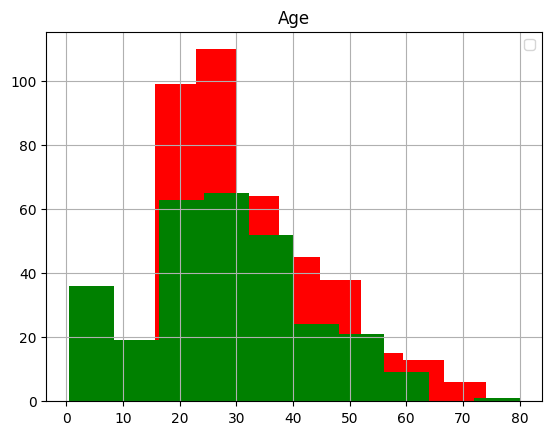

In [79]:
new_data[new_data['Survived'] == 0]['Age'].hist(color = 'red')
new_data[new_data['Survived'] == 1]['Age'].hist(color = 'green')
plt.title('Age')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


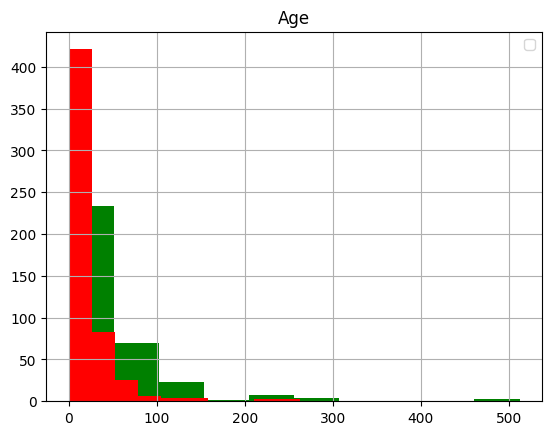

In [82]:

new_data[new_data['Survived'] == 1]['Fare'].hist(color = 'green')
new_data[new_data['Survived'] == 0]['Fare'].hist(color = 'red')
plt.title('Age')
plt.legend()

In [81]:
new_data.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [86]:
data.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64